In [1]:
import matplotlib
from matplotlib.pyplot import *
from numpy import *
import pylab as plt

0.700000000000001


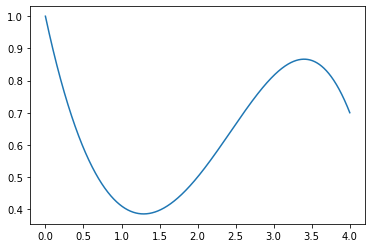

In [5]:
#Quizz 8

def rungekutta(alpha,a,b,N,F):
    h = (b-a)/N
    ys = zeros([N+1,alpha.size])
    ys[0] = alpha
    xs = arange(a,b+h,h)
    for i in range(N):
        ys[i+1] = ys[i] + h/2*(F(a + i*h, ys[i]) + F(a + i*h + h, ys[i]+h*F(a + i*h, ys[i])))
    return xs,ys

def Fnthorder(x,yvec):
    res = zeros(yvec.size)
    for i in range(yvec.size-1):
        res[i] = yvec[i+1]
    res[yvec.size-1] = f(x,yvec)
    return res

def secant(f,x0,xm1):
    xs=[xm1,x0]
    for i in range(3):
        xs.append( (xs[-1]*f(xs[-2])-xs[-2]*f(xs[-1])) / (f(xs[-2])-f(xs[-1])) )
    return xs

# these are the appropriate values for the "boundary conditions"
a=0
b=2
c=4
alpha=1
beta=0.5
gamma=0.7

# you must define f properly here
def f(x,yvec):
    return -yvec[0]

def G2(u2):
    def G1(u1):
        xs,ys = rungekutta(array([alpha,u1,u2]),a,b,2000,Fnthorder)
     # y(a) = y(0) = alpha, y'(a) = y'(0) = u
        return ys[-1,0] - beta
    u1sol = secant(G1,0,1)[-1]# ys[n,i] where n indentifies the position, and i identifies y or y'
    xs,ys = rungekutta(array([alpha,u1sol,u2]),a,c,2000,Fnthorder)
     # y(a) = y(0) = alpha, y'(a) = y'(0) = u
    return ys[-1,0] - gamma  # ys[n,i] where n indentifies the position, and i identifies y or y'
u2sol = secant(G2,0,1)[-1] # solving for y(b) = beta

def G1(u1):
    xs,ys = rungekutta(array([alpha,u1,u2sol]),a,b,2000,Fnthorder)
     # y(a) = y(0) = alpha, y'(a) = y'(0) = u
    return ys[-1,0] - beta
u1sol = secant(G1,0,1)[-1]# ys[n,i] where n indentifies the position, and i identifies y or y'

xs,ys = rungekutta(array([alpha,u1sol,u2sol]),a,c,2000,Fnthorder)

# then write an appropriate code that set ys[:,0] to the correct numerical solution,
# and xs to the list of x values.
print(ys[-1,0])

plt.plot(xs,ys[:,0])

In [10]:
#Quizz 9

def stochastic(T):
    dt=0.001
    ts = arange(0,T,dt)
    N = ts.size
    xs = zeros(N)
    xs[0]=0
    sdt= sqrt(dt)
    for i in range(1,N):
        xs[i] = xs[i-1] +xs[i-1]**2*dt+ ts[i-1]*random.normal(0,sdt)
    # put the right code here
    return ts,xs

ts,xs = stochastic(1) # use your function here

In [14]:
sizex = 15
sizey = 15

def relaxation(init):
    res = init[:]
    for x in range(1,sizex-1):
        for y in range(1,sizey-1):
            res[x,y] = (init[x-1,y]+init[x+1,y]+3*init[x,y-1]+3*init[x,y+1])/8
    return res


solution = array([[1.]*sizey]*sizex) # this initial value does not matter

for i in range(15):
    solution[i,14]=solution[14,i]=2
    solution[0,i]=solution[i,0]=1
    # here we put the right boundary conditions

for i in range(20):
    solution=relaxation(solution)
    # 20-step interation

In [17]:
#Question 1
a,b = 0,1 #Define beg and end of integration


from scipy import integrate
def h(i): #Find h(k)s
    return 1/(i+2)

def thenodes(n):
    # finding xi
    B = array([[0.]*(n+1)]*(n+1))    # arrays of 0's, with "0." we tell python that these are floating point numbers
    u = array([0.]*(n+1))
    for k in range(n+1):
        u[k] = - h(n+1+k)
        for i in range(n+1):
            B[k,i] = h(k+i)
    cs = linalg.solve(B,u)
    cs = append(cs,[1])        # must add last coefficient which is 1 for x^(n+1)
    xs = roots(cs[::-1]).real   # roots calculates roots of polynomial, but with inverse order of coefficients (zeros of phi function)
    # finding Ai
    As = array([0.]*(n+1))
    for m in range(n+1): #m was written as k but in notes is m
        u[m] = h(m)
    return xs
print(thenodes(3))

[0.9428958  0.72315699 0.41640957 0.13975986]


In [18]:
#Question 2
n=0 # set the counter of the points inside to zero N=10000 (Chosen or given) # total number of ‘experiments ‘
N = 10000
def mc(N):
    for i in range(N):
        x = random.uniform(-2,2)
        y = random.uniform(-2,2)#Square taken S
        if (x**2+y**2<1): #inside GIVEN FUNCTION LOOKING FOR INTEGRAL
            n = n+1 # increase the counter of the points inside
    p1 = n/N # our estimate for the probability
    S1 = p1*4*4 # our estimate for the area #2*2 square of total area
    error=4*4*sqrt(p1*(1-p1))/(sqrt(N)) # error of the approximation Sxsqrt(S1xS2/N)

In [71]:
#Question 3
def euler(h):
    N=int(1/h)
    ys = zeros([N+1,alpha.size])
    ys[0] = array([2.,0.,0.])
    xs = arange(1+h,h)
    for i in range(N):
        ys[i+1] = ys[i] + h*F(a+i*h,ys[i])
    return xs,ys

def Fnthorder(x,yvec):
    res = zeros(yvec.size)
    for i in range(yvec.size-1):
        res[i] = yvec[i+1]
    res[yvec.size-1] = f(x,yvec)
    return res

def f(x,yvec):
    return cos(x)+y[0]

In [72]:
#Question 4
def F(x,yvec):
    res=zeros(3)
    res[0]=3*x**2
    res[1]=yvec[0]+yvec[2]
    res[2]= x
    return res

In [51]:
#Question 5
def stochastic(T):#a(x)=0, b(x)=sigma
    dt=0.1
    ts = arange(0,T+dt,dt)
    N = ts.size
    ys = zeros(N)
    ys[0]=4
    sdt = sqrt(dt) #standard deviation
    for i in range(1,N):
        ys[i] = ys[i-1] + ts[i-1]**2*dt +e*(ys[i-1])* random.normal(0,sdt)
    return ys[-1]

print("The result at T=0 is",stochastic(0))

The result at T=0 is 4.0


In [67]:
#Question 6
sizex=11
sizey=11

def relaxation(init):#Take average of sorrounding values without extremities
    res = init[:]
    h=0.1
    for x in range(1,sizex-1):
        for y in range(1,sizey-1):
            res[x,y] = (init[x-h,y]+init[x+h,y]+init[x,y-h]+init[x,y+h]-5*h**2)/4
    return res

In [61]:
#SOLUTION Question 7
def mc(N):
    n=0
    for i in range(N):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        z = random.uniform(0,2)
        if (z<x**2+y**2):
            n = n+1
    return n*8/N
print(mc(10000))

2.7032


In [60]:
#Question 7
n=0 # set the counter of the points inside to zero N=10000 (Chosen or given) # total number of ‘experiments ‘
N = 10000
def mc1(N):
    for i in range(N):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)#Square taken S
        if (x**2+y**2<1): #inside GIVEN FUNCTION LOOKING FOR INTEGRAL
            n = n+1 # increase the counter of the points inside
    p1 = n/N # our estimate for the probability
    S1 = p1*4*4 # our estimate for the area #2*2 square of total area
    error=4*4*sqrt(p1*(1-p1))/(sqrt(N))
print(mc(10000))

2.7208
